In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/survey_results_public.csv")
df.head(5)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [39]:
data = df[["Country", "EdLevel", "YearsCodePro",  "ConvertedCompYearly"]]
data = data.rename({"ConvertedCompYearly": "Salary"}, axis=1)
data.head()

,Country,EdLevel,YearsCodePro,Salary
0,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0


In [40]:
data2 = data[data["Salary"].notnull()]
data2.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0


In [41]:

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Salary        48019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [42]:
data2 = data2.dropna()
data2.isnull().sum()

,0
Country,0
EdLevel,0
YearsCodePro,0
Salary,0


In [43]:
data2['Country'].value_counts()

,count
Country,
United States of America,11847
Germany,3947
United Kingdom of Great Britain and Northern Ireland,3522
Canada,2095
India,1850
...,...
Guinea-Bissau,1
Mauritania,1
Botswana,1


In [44]:

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [48]:

country_map = shorten_categories(df.Country.value_counts(), 400)
data2['Country'] = data2['Country'].map(country_map)
data2.Country.value_counts()

,count
Country,
United States of America,11847
Germany,3947
United Kingdom of Great Britain and Northern Ireland,3522
Canada,2095
India,1850
France,1793
Netherlands,1359
Poland,1265
Brazil,1249


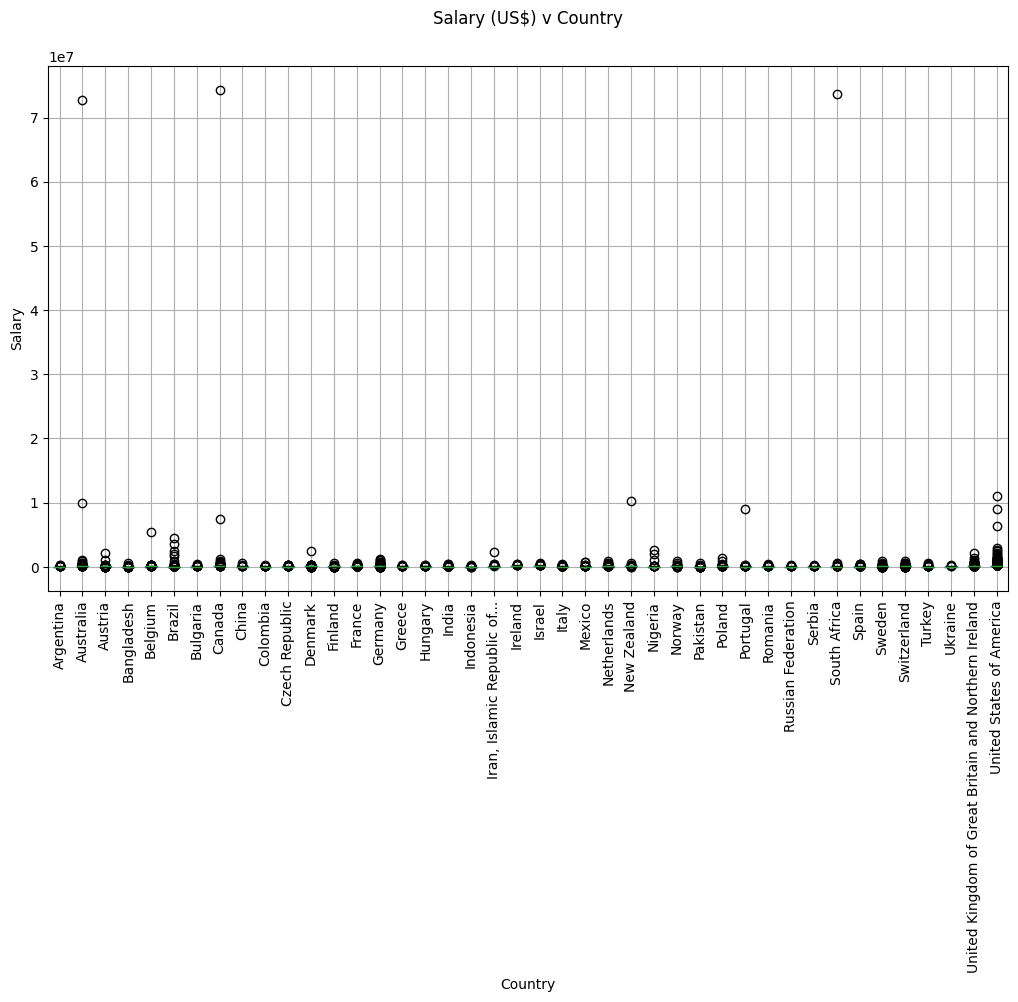

In [49]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data2.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [122]:
data2 = data2[data2["Salary"] <= 250000]
data2 = data2[data2["Salary"] >= 10000]
data2 = data2[data2['Country'] != 'Other']

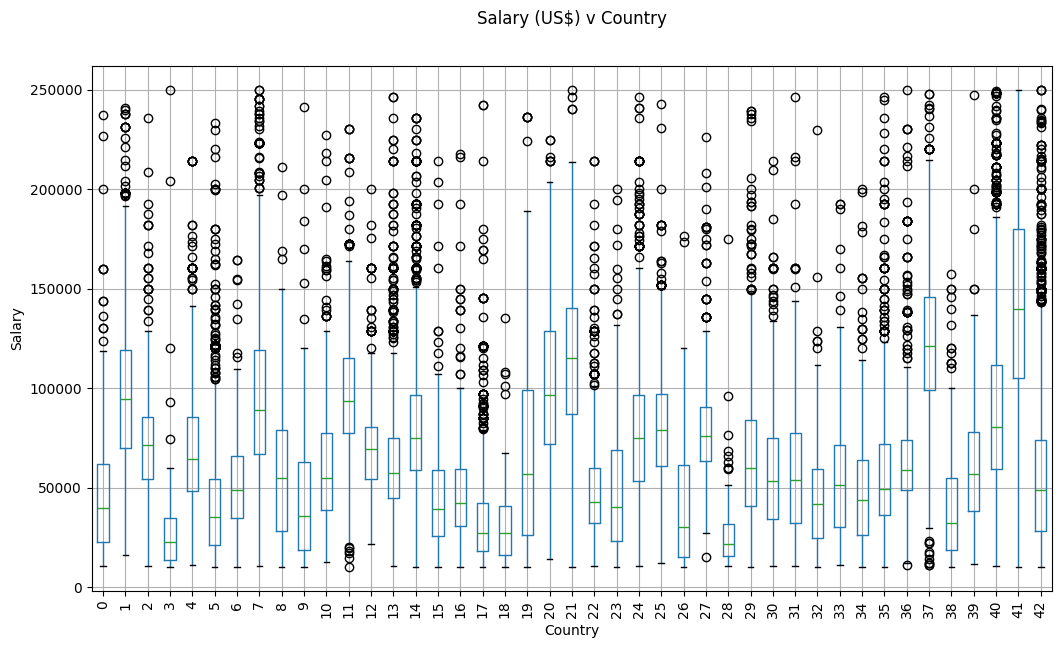

In [123]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data2.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [137]:
import pandas as pd

# Assuming the data is in the same CSV file as before
df = pd.read_csv("/content/survey_results_public.csv")
data = df[["Country", "EdLevel", "YearsCodePro", "ConvertedCompYearly"]]
data = data.rename({"ConvertedCompYearly": "Salary"}, axis=1)

# Now you can assign it to data3 and call .head()
data3 = data
data3.head()


,Country,EdLevel,YearsCodePro,Salary
0,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0


In [139]:
data3.dropna(inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47825 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47825 non-null  object 
 1   EdLevel       47825 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Salary        47825 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [140]:
data3["YearsCodePro"].unique()

array(['9', '23', '7', '4', '21', '3', '15', 'Less than 1 year', '10',
       '2', '6', '14', '5', '19', '13', '16', '28', '30', '11', '8', '24',
       '40', '17', '29', '25', '12', '20', '18', '50', '27', '43', '26',
       '1', '38', '33', '22', '35', '31', '34', '32', '37', '42',
       'More than 50 years', '36', '39', '41', '44', '48', '45', '46',
       '47', '49'], dtype=object)

In [141]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

data3['YearsCodePro'] = data3['YearsCodePro'].apply(clean_experience)

In [142]:
data3["YearsCodePro"].unique()

array([ 9. , 23. ,  7. ,  4. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,  6. ,
       14. ,  5. , 19. , 13. , 16. , 28. , 30. , 11. ,  8. , 24. , 40. ,
       17. , 29. , 25. , 12. , 20. , 18. , 50. , 27. , 43. , 26. ,  1. ,
       38. , 33. , 22. , 35. , 31. , 34. , 32. , 37. , 42. , 36. , 39. ,
       41. , 44. , 48. , 45. , 46. , 47. , 49. ])

In [143]:
data3["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [144]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

data3['EdLevel'] = data3['EdLevel'].apply(clean_education)

In [145]:
data3["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [146]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
data3['EdLevel'] = le_education.fit_transform(data3['EdLevel'])
data3["EdLevel"].unique()

array([0, 1, 2, 3])

In [147]:
le_country = LabelEncoder()
data3['Country'] = le_country.fit_transform(data3['Country'])
data3["Country"].unique()

array([163, 119, 161,  49,   8, 105,  53, 146,  50,   1, 109, 141, 139,
        21, 121,  71,  12,  28,   6, 147, 142,  86, 133,  36,  64,  44,
        81, 126,  55,   9, 111, 135, 156,  34, 120,  66,  77, 104, 137,
        31,  15, 125,  39,  62, 123, 167,  70, 159, 110,  42,  69,  46,
       100, 152, 165,  87,  65,  68,  52,  17,  73, 166,  11, 150,  37,
        93,  14, 112,  99,  19, 170,   7,  90, 131, 155,  76, 160,   0,
       113,  40,  47, 117, 106, 116, 169, 107,  74, 136,  23, 164, 118,
       154,  61, 151,  43,  32,  96, 124,  56,  98,  45,  30,  35,  75,
        10,  18,  63,   2, 148, 138,  72,  38, 102,  60, 168,  67, 122,
        80,  33,  82, 140,  54,  48, 149,  95,  91,  78,  26,  22,  79,
       157, 158,   3, 115,  88, 162,  27, 101,  13,  51,  92,  58, 114,
        89, 132,  16, 153,  59,   4, 134, 103,  20, 127,  94, 129,  97,
       145,  83, 108,  41,  85, 128, 144,  25,  29, 143,  57, 130,  84,
        24,   5])

In [148]:
X = data3.drop("Salary", axis=1)
y = data3["Salary"]

In [149]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [150]:
y_pred = linear_reg.predict(X)

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [152]:
error

681792.022496249

In [153]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [154]:
DecisionTreeRegressor(random_state=0)
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$337,438.57


In [155]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)
RandomForestRegressor(random_state=0)
y_pred = random_forest_reg.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$423,131.58


In [156]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [157]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$680,979.28


In [158]:
X

,Country,EdLevel,YearsCodePro
1,163,0,9.0
2,163,0,23.0
3,163,0,7.0
4,119,0,4.0
5,161,1,21.0
...,...,...,...
89162,21,2,24.0
89166,7,1,2.0
89167,64,0,2.0
89170,50,2,9.0


In [170]:
X = np.array([["India", 'Bachelor’s degree', 50 ]])
X

array([['India', 'Bachelor’s degree', '50']], dtype='<U21')

In [182]:

import numpy as np
from sklearn.preprocessing import LabelEncoder

# Define the dataset
X = np.array([["India", "Master’s degree", 10 ]], dtype=object)

# Initialize LabelEncoders
le_country = LabelEncoder()
le_education = LabelEncoder()

# Encode columns separately
X_country = le_country.fit_transform(X[:, 0])  # Encoding Country
X_education = le_education.fit_transform(X[:, 1])  # Encoding Education

# Convert encoded values to float and reconstruct X
X = np.column_stack((X_country, X_education, X[:, 2].astype(float)))

print(X)


[[ 0.  0. 10.]]


In [183]:
y_pred = regressor.predict(X)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([78837.95965856])

In [186]:
import pickle
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]